In [1]:
import cv2
import os

import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
(trainX, trainY), (testX, testY) = mnist.load_data()
num_of_test = 60
testX = trainX[0:num_of_test] 
trainX = trainX[0:num_of_test-10]
size_x = 28
size_y = 28
trainX.shape

(50, 28, 28)

In [16]:
# Load all images in the folder
img_folder = 'pres'
original_images = []
for image in os.listdir(img_folder):
    original_images.append(cv2.imread(img_folder + "\\" + image, 0))

In [17]:
# Resize them so that they are all equal size
resized = []
size_x = 120
size_y = 120
for image in original_images:
    resized.append(cv2.resize(image, [size_x, size_y], interpolation = cv2.INTER_AREA))

In [18]:
resized = np.array(resized)
num_of_test = resized.shape[0]
testX = resized[0:num_of_test] 
trainX = resized[0:num_of_test-1]
trainX.shape

(2, 120, 120)

In [36]:
def train_model(trainX, testX, noise_percentage=0.2, learning_rate=0.001, num_layers=1, epochs=10, batch_size=1, num_of_test=1):
    clear_session()
    # Normalize
    trainX = trainX.astype('float32') / 255
    testX = testX.astype('float32') / 255
    
    # Make 1D image
    pixel_size = trainX.shape[1] * trainX.shape[2]
    trainX = trainX.reshape(trainX.shape[0], pixel_size)
    testX = testX.reshape(testX.shape[0], pixel_size)
    # Add noise
    trainX_noise = trainX + noise_percentage * np.random.normal(loc=0.0, scale=1.0, size=trainX.shape)
    testX_noise = testX + noise_percentage * np.random.normal(loc=0.0, scale=1.0, size=testX.shape)
    trainX_noise = np.clip(trainX_noise, 0., 1.)
    testX_noise = np.clip(testX_noise, 0., 1.)
    
    # Make model
    model = Sequential()
    if num_layers == 1:
        model.add(Dense(10, input_dim=pixel_size, activation='relu'))
        model.add(Dense(pixel_size, activation='sigmoid'))
        
    elif num_layers == 2:
        model.add(Dense(10, input_dim=pixel_size, activation='sigmoid'))
        model.add(Dense(20, activation='sigmoid'))
        model.add(Dense(pixel_size, activation='sigmoid'))
    else:
        model.add(Dense(10, input_dim=pixel_size, activation='sigmoid'))
        for _ in range(num_layers-1):
            model.add(Dense(20, activation='sigmoid'))
        model.add(Dense(pixel_size, activation='sigmoid'))
    
    opt = Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=opt)
    model.fit(trainX_noise, trainX, validation_data=(testX_noise, testX), epochs=epochs, batch_size=batch_size)
    
    prediction = model.predict(testX_noise)
    
    prediction = np.reshape(prediction, (num_of_test, size_x, size_y))
    testX_noise = np.reshape(testX_noise, (-1, size_x, size_y))
    return prediction, testX_noise

In [37]:
pred, testX_noise = train_model(trainX, testX, noise_percentage=0.2, learning_rate=1e-2, num_layers=1, epochs=5, batch_size=1, num_of_test=num_of_test)

Epoch 1/5
50/50 [==============================] - 0s 3ms/step - loss: 0.0987 - val_loss: 0.0712
Epoch 2/5
50/50 [==============================] - 0s 2ms/step - loss: 0.0656 - val_loss: 0.0622
Epoch 3/5
50/50 [==============================] - 0s 2ms/step - loss: 0.0607 - val_loss: 0.0600
Epoch 4/5
50/50 [==============================] - 0s 2ms/step - loss: 0.0586 - val_loss: 0.0595
Epoch 5/5
2/2 [==============================] - 0s 1ms/step


In [38]:
pred[0]==pred[2]

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False

In [41]:
num_image=55

Test Image


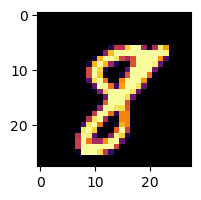

Test Image with Noise


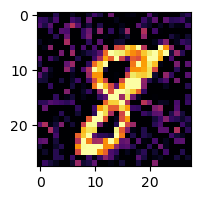

Reconstruction of Noisy Test Images


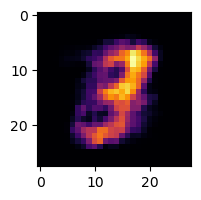

In [42]:
plt.figure(figsize=(10, 2))
print("Test Image")
plt.imshow(testX[num_image], cmap='inferno')
plt.show() 

plt.figure(figsize=(10, 2))
print("Test Image with Noise")
plt.imshow(testX_noise[num_image], cmap='inferno')
plt.show()    

plt.figure(figsize=(10, 2))
print("Reconstruction of Noisy Test Images")
plt.imshow(pred[num_image], cmap='inferno')  
plt.show()